[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosfab/vis101-fundamentos-visao/blob/main/notebooks/01_fundamentos_processamento_imagens.ipynb)

# 📘 1 – Fundamentos do Processamento Digital de Imagens

Este notebook cobre os principais conceitos introdutórios de imagens digitais, incluindo **amostragem (sampling)** e **quantização (quantization)**, simulando o processo de digitalização de sinais analógicos. A abordagem será apresentada de forma progressiva.

## Imagens Digitais

Uma **imagem monocromática** (ou imagem em tons de cinza) pode ser modelada matematicamente por uma função bidimensional:

$$
f : \mathbb{R}^2 \to \mathbb{R}
$$

A amplitude de $f(x, y)$, ou seja, o valor da função no ponto espacial $(x, y)$, é chamada de **intensidade** ou **nível de cinza**. Este valor está relacionado a alguma grandeza física, determinada pelo sensor ou dispositivo de aquisição — por exemplo, pode representar a energia luminosa refletida por uma superfície. Na prática, consideramos imagens com valores finitos, isto é, $|f(x, y)| < \infty$.

É comum aplicar uma transformação afim nos valores da imagem para normalizar sua amplitude:

$$
f \leftarrow af + b \quad \text{com } f \in [0, 1]
$$

Essa operação facilita o processamento e análise da imagem digital.

### Da imagem contínua à imagem digital

Uma **imagem digital** é obtida a partir da função contínua $f(x, y)$ por dois processos fundamentais:

1. **Amostragem** – discretização das coordenadas espaciais $x$ e $y$;
2. **Quantização** – discretização dos valores de intensidade $f(x, y)$.

O resultado é uma matriz discreta:

$$
M = (m_{ij}), \quad i \in [0, W-1], \quad j \in [0, H-1], \quad m_{ij} \in [0, L-1]
$$

Aqui, $W$ e $H$ representam, respectivamente, a **largura** e a **altura** (em pixels), e $L$ é o número de **níveis de quantização**.

Cada elemento $m_{ij}$ da matriz corresponde a uma amostra da função contínua:

$$
m_{ij} = q(f(x_0 + i \cdot \Delta x,\; y_0 + j \cdot \Delta y))
$$

onde $\Delta x$ e $\Delta y$ são os passos de amostragem, e $q: \mathbb{R} \to \{0, \dots, L-1\}$ é a função de quantização.

### Representação computacional

Imagens em tons de cinza geralmente utilizam **8 bits por pixel**, ou seja, $L = 2^8 = 256$ níveis de cinza — de 0 (preto) a 255 (branco).

Durante o processamento, é comum converter os valores inteiros para `float` (ex.: `float32`), realizar as operações matemáticas e depois re-quantizar em 8 bits para armazenamento.

Em aplicações como imagens médicas, usa-se maior profundidade (ex.: 10 ou 12 bits por pixel) para evitar artefatos visuais da quantização.

### Imagens coloridas

Imagens RGB são compostas por três imagens monocromáticas correspondentes aos canais:

- R: vermelho (Red)
- G: verde (Green)
- B: azul (Blue)

Cada pixel é representado por 3 bytes, totalizando $2^{24} \approx 16.8$ milhões de cores. Técnicas aplicadas a imagens monocromáticas podem ser aplicadas a cada canal separadamente.

### Resolução espacial e de intensidade

- **Resolução espacial**: densidade de pixels por unidade de comprimento (ex.: dpi). Muitas vezes confundida com a dimensão da imagem (ex.: 1920×1080), mas deve ser referenciada em unidades físicas (cm, mm, etc.).
- **Resolução de intensidade**: número de níveis discretos de cinza. Está ligada à profundidade de bits da imagem.

### Compressão

O número de bits necessários para armazenar uma imagem é:

$$
b = W \cdot H \cdot \log_2(L)
$$

Como esse valor pode ser elevado, utiliza-se compressão (como JPEG) para reduzir o tamanho, explorando **redundância espacial e estatística**.

## Sampling e Quantization

### **Exemplo 1 - Geração de um sinal com variações abruptas**

Utilizamos uma combinação de senóides para simular um sinal analógico, com picos e vales para representar algo do mundo analógico.

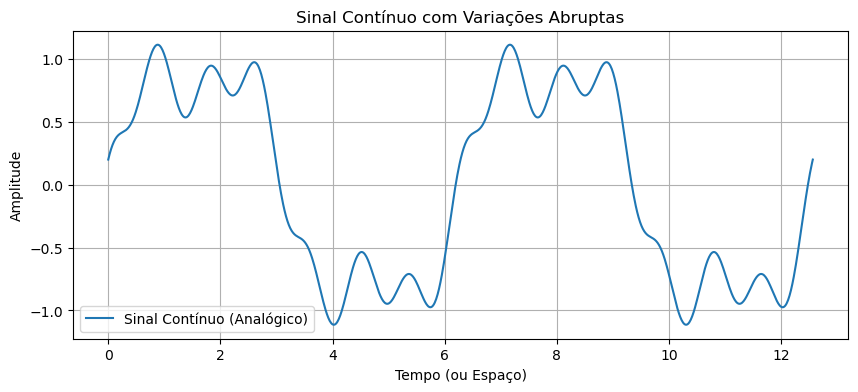

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

x = np.linspace(0, 4*np.pi, 1000)
y = np.sin(x) + 0.3 * np.sin(3*x) + 0.2 * np.cos(7*x)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Sinal Contínuo (Analógico)')
plt.title("Sinal Contínuo com Variações Abruptas")
plt.xlabel("Tempo (ou Espaço)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#### **Amostragem: Discretização do domínio contínuo**

Amostramos o sinal a intervalos regulares. Este processo corresponde à conversão física realizada por sensores, que capturam um valor por pixel ou unidade espacial.

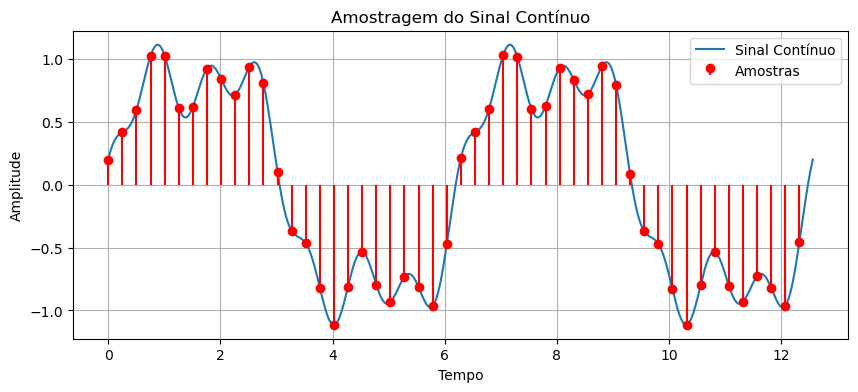

In [4]:
sample_factor = 20
x_sampled = x[::sample_factor]
y_sampled = y[::sample_factor]

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Sinal Contínuo')
plt.stem(x_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt=' ', label='Amostras')
plt.title("Amostragem do Sinal Contínuo")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

#### **Quantização: Redução da resolução em amplitude**

Aplicamos uma função de quantização uniforme para limitar os valores possíveis da amplitude a um número fixo de níveis. Reforçamos visualmente o conceito de quantização ao desenhar retângulos delimitando as regiões espaciais e de amplitude em que os valores foram "encaixados".


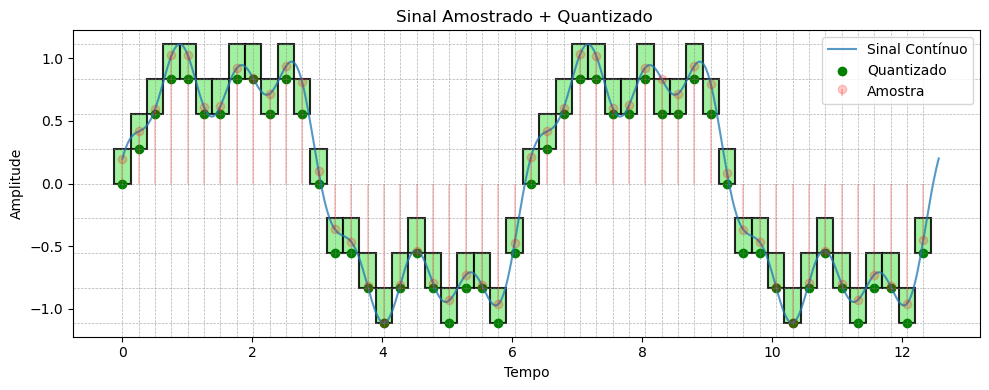

In [24]:
# Quantização
num_levels = 8
y_min, y_max = y.min(), y.max()
step = (y_max - y_min) / num_levels
y_quantized = np.floor((y_sampled - y_min) / step) * step + y_min

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Sinal Contínuo', alpha=0.75)

# Amostras com perninhas (vermelho claro)
markerline, stemlines, baseline = plt.stem(x_sampled, y_sampled,
                                           linefmt='r-', markerfmt='ro', basefmt=' ',
                                           label='Amostra')
plt.setp(markerline, alpha=0.2)
plt.setp(stemlines, alpha=0.2)

# Linhas horizontais de quantização
for i in range(num_levels + 1):
    y_line = y_min + i * step
    plt.axhline(y_line, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Linhas verticais de amostragem
for x_tick in x_sampled:
    plt.axvline(x_tick, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Casas de quantização com preenchimento leve e borda destacada
delta_x = (x[1] - x[0]) * sample_factor
for xi, yi in zip(x_sampled, y_quantized):
    plt.gca().add_patch(plt.Rectangle(
        (xi - delta_x / 2, yi),
        width=delta_x,
        height=step,
        edgecolor='black',
        facecolor='lightgreen',
        linewidth=1.5,
        alpha=0.85
    ))

# Pontos quantizados (bolinhas verdes)
plt.scatter(x_sampled, y_quantized, color='green', label='Quantizado')

plt.title("Sinal Amostrado + Quantizado ")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


## Exemplo 2 - Imagens Sintéticas com Degradê

### **Gradiente circular**

Criamos uma imagem 2D em tons de cinza em que cada pixel tem valor proporcional à sua distância ao centro. Isso gera um degradê circular, útil para análise isotrópica.

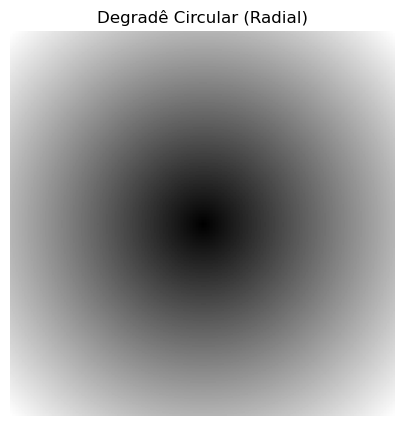

In [38]:
# Tamanho da imagem
height, width = 256, 256
cx, cy = width // 2, height // 2

# Cria coordenadas X e Y relativas ao centro
x = np.arange(width) - cx
y = np.arange(height) - cy
X, Y = np.meshgrid(x, y)

# Calcula a distância euclidiana ao centro
radius = np.sqrt(X**2 + Y**2)

# Normaliza o degradê para o intervalo [0, 255]
gradient_circular = 255 * (radius / radius.max())

plt.figure(figsize=(5, 5))
plt.imshow(gradient_circular, cmap='gray', interpolation='nearest')
plt.title("Degradê Circular (Radial)")
plt.axis('off')
plt.show()


#### **Amostragem + Quantização do Degradê Circular**

Aplicamos a cadeia de digitalização completa: subamostragem + quantização. O resultado mostra como diferentes regiões perdem detalhes de forma variada, dependendo da sua taxa de variação espacial.

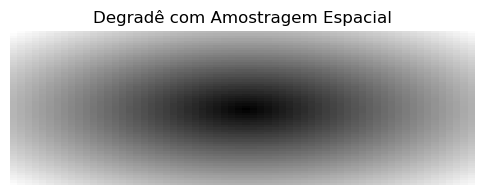

In [41]:
gradient_sampled = gradient_circular[::4, ::4]

plt.figure(figsize=(6, 2))
plt.imshow(gradient_sampled, cmap='gray', aspect='auto', interpolation='nearest')
plt.title("Degradê com Amostragem Espacial")
plt.axis('off')
plt.show()

`num_levels = 8`

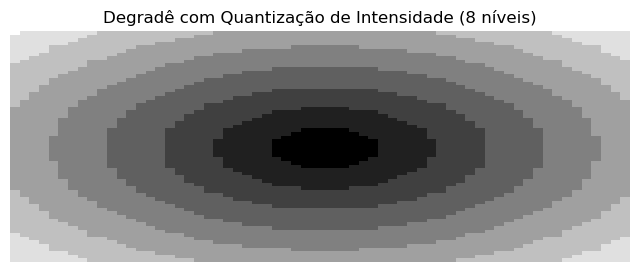

In [42]:
def quantize_image(image, levels):
    image_min = image.min()
    image_max = image.max()
    step = (image_max - image_min) / levels
    return np.floor((image - image_min) / step) * step + image_min

gradient_quantized = quantize_image(gradient_sampled, 8)

plt.figure(figsize=(8, 3))
plt.imshow(gradient_quantized, cmap='gray', aspect='auto')
plt.title("Degradê com Quantização de Intensidade (8 níveis)")
plt.axis('off')
plt.show()

`num_levels = 4`

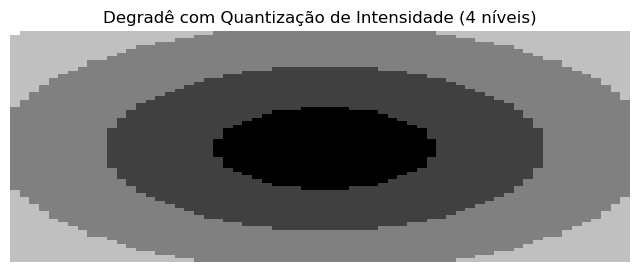

In [43]:
def quantize_image(image, levels):
    image_min = image.min()
    image_max = image.max()
    step = (image_max - image_min) / levels
    return np.floor((image - image_min) / step) * step + image_min

gradient_quantized = quantize_image(gradient_sampled, 4)

plt.figure(figsize=(8, 3))
plt.imshow(gradient_quantized, cmap='gray', aspect='auto')
plt.title("Degradê com Quantização de Intensidade (4 níveis)")
plt.axis('off')
plt.show()

## Exemplo 3 - Imagem Real em Tons de Cinza

#### **Conversão para Matriz 2D**

Carregamos uma imagem real, convertemos para escala de cinza e transformamos em uma matriz bidimensional com valores entre 0–255.

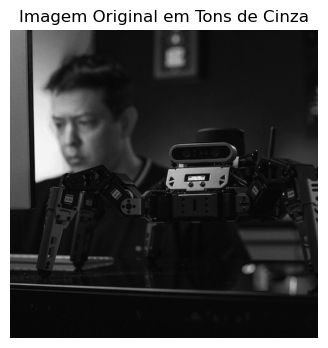

In [47]:
# Caminho base para imagens
from pathlib import Path

NOTEBOOK_DIR = Path.cwd()
IMAGE_DIR = NOTEBOOK_DIR.parent / "images"

# Carrega imagem em tons de cinza
img = Image.open(IMAGE_DIR / 'hexapod.jpg').convert('L')
img_np = np.array(img)

plt.figure(figsize=(6, 4))
plt.imshow(img_np, cmap='gray')
plt.title("Imagem Original em Tons de Cinza")
plt.axis('off')
plt.show()

#### **Amostragem da imagem**

Reduzimos sua resolução para simular captura com menos pixels, com `img[::fator, ::fator]`.

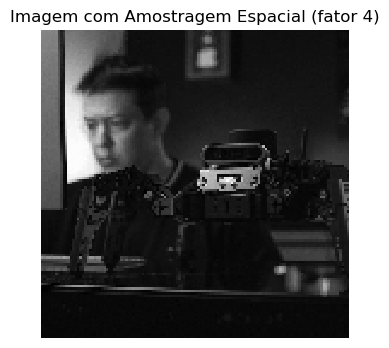

In [48]:
# Amostragem espacial com fator 4
sampling_factor = 4
img_sampled = img_np[::sampling_factor, ::sampling_factor]

plt.figure(figsize=(6, 4))
plt.imshow(img_sampled, cmap='gray', interpolation='nearest')
plt.title("Imagem com Amostragem Espacial (fator 4)")
plt.axis('off')
plt.show()

#### Quantização de Intensidade

Agora aplicamos a função de quantização na imagem amostrada (não na original).

`num_levels = 8`

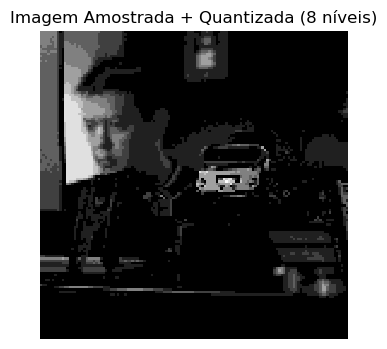

In [51]:
# Função de quantização uniforme
def quantize_image(image, levels):
    image_min = image.min()
    image_max = image.max()
    step = (image_max - image_min) / levels
    return np.floor((image - image_min) / step) * step + image_min

# Quantizando a imagem amostrada (ex: 8 níveis)
quantization_levels = 8
img_quantized = quantize_image(img_sampled, quantization_levels)

plt.figure(figsize=(6, 4))
plt.imshow(img_quantized, cmap='gray', interpolation='nearest')
plt.title("Imagem Amostrada + Quantizada (8 níveis)")
plt.axis('off')
plt.show()

`num_levels = 2`

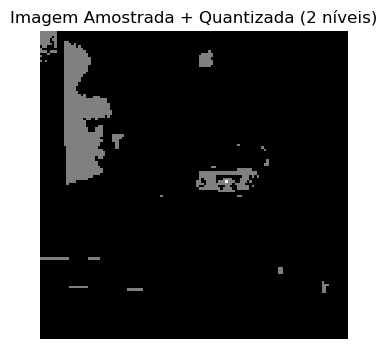

In [52]:
# Função de quantização uniforme
def quantize_image(image, levels):
    image_min = image.min()
    image_max = image.max()
    step = (image_max - image_min) / levels
    return np.floor((image - image_min) / step) * step + image_min

# Quantizando a imagem amostrada (ex: 2 níveis)
quantization_levels = 2
img_quantized = quantize_image(img_sampled, quantization_levels)

plt.figure(figsize=(6, 4))
plt.imshow(img_quantized, cmap='gray', interpolation='nearest')
plt.title("Imagem Amostrada + Quantizada (2 níveis)")
plt.axis('off')
plt.show()

## 📚 Conclusão

- A **amostragem** reduz a resolução espacial.
- A **quantização** reduz os níveis de intensidade (profundidade de bits).
- Ambas as operações são fundamentais na digitalização de imagens.

Esse processo é essencial para sensores, câmeras digitais, compressão de imagens e muito mais.